In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fftshift
from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors
import os

In [2]:
directory="C:/Users/ameya/OneDrive - University of Pittsburgh/Eclipse/DataFiles/FinalTests(10.3.23)/BaffleTests"
Data=np.zeros((2,2))
startindex=0
for i in range(startindex,startindex+len(os.listdir(directory))):
    print(i)
    path=os.path.join(directory,"LSdate0_"+str(i)+".txt")
    df=np.loadtxt(path,delimiter="\t")
    Data=np.concatenate((Data,df.T),axis=1)
print(Data)
Data[1]=Data[1]-Data[1][0]
Data[0]=Data[0]/2

0
1
[[ 0.00000000e+00  0.00000000e+00 -6.82685030e-01 ...  4.59461000e-03
   4.61796000e-03  4.61856000e-03]
 [ 0.00000000e+00  0.00000000e+00  1.70205284e+09 ...  1.70205343e+09
   1.70205343e+09  1.70205343e+09]]


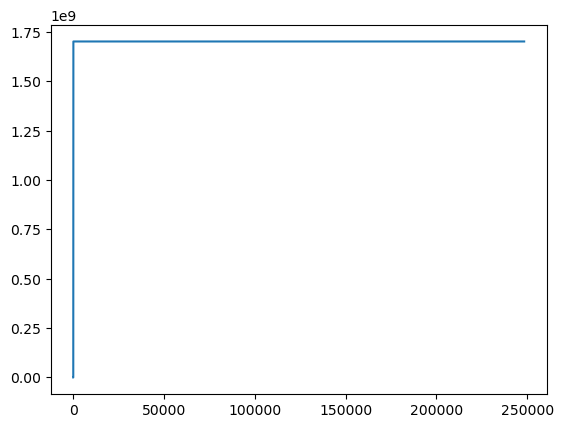

In [4]:
plt.plot(np.linspace(0,len(Data[1]),len(Data[1])),Data[1])
#plt.xlim(-100,1000)
index=2

In [5]:
newVData=Data[0][index:-1]
newTData=Data[1][index:-1]-Data[1][index]
newData=np.array([newVData.T,newTData.T])
print(newData)

[[-3.41342515e-01  1.58955599e+00  1.58947605e+00 ...  2.29161500e-03
   2.29730500e-03  2.30898000e-03]
 [ 0.00000000e+00  2.36296654e-03  4.71210480e-03 ...  5.84218863e+02
   5.84221214e+02  5.84223567e+02]]


(0.4, 0.45)

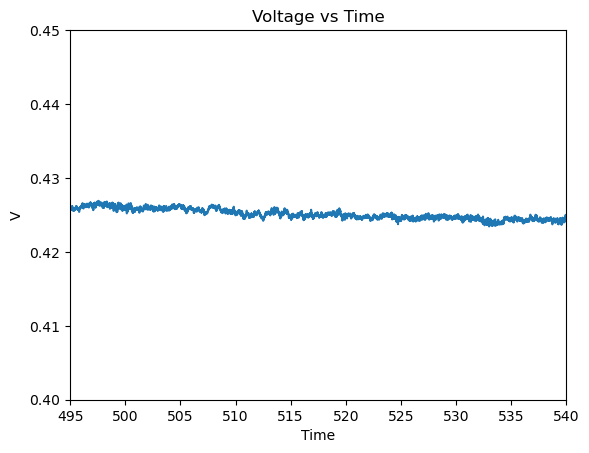

In [40]:
plt.plot(newData[1],newData[0])
plt.title("Voltage vs Time")
plt.ylabel("V")
plt.xlabel("Time")
#plt.ylim(-0.0004,-0.0002)
#plt.ylim(-0.0007,0)
plt.xlim(495,540)
plt.ylim(0.4,0.45)
#plt.ylim(1.5,1.6)

0.42511033972220763
[1.58950309 1.59046905 1.59046957 ... 0.05377765 0.05300913 0.05224057]


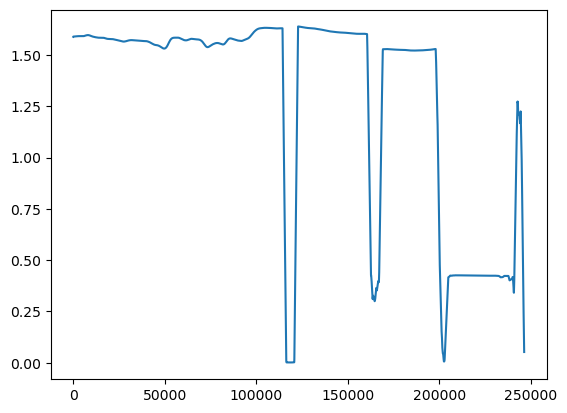

In [41]:
slicestart=np.where(newData[1]>495)[0][0]
endstart=np.where(newData[1]>540)[0][0]
print(np.mean(newData[0][slicestart:endstart]))
w=5*400
dStds=np.mean(np.lib.stride_tricks.sliding_window_view(newData[0], w),axis=1)
print(dStds)
plt.plot(dStds)
#plt.ylim(0,1e-5)
plt.show()

425.6880138029027


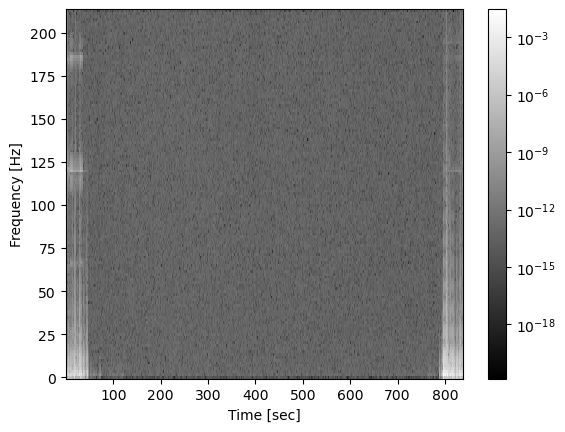

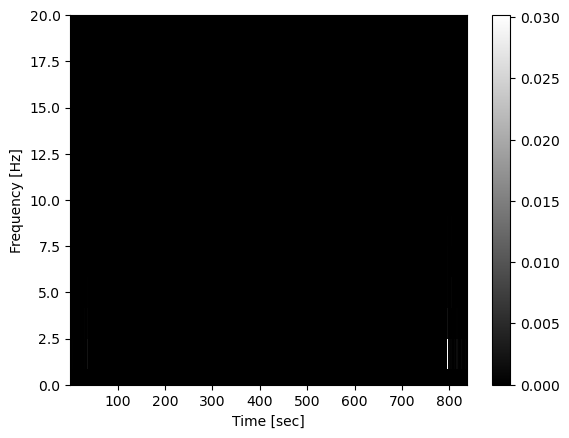

In [10]:
x=newData[0]
fs=1/np.median(np.diff(Data[1]))
print(fs)
f, t, Sxx = signal.spectrogram(x, fs)

plt.pcolormesh(t, f, Sxx,norm=colors.LogNorm(vmin=Sxx.min(), vmax=Sxx.max()),cmap="gray")
plt.colorbar()
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

plt.pcolormesh(t,f,Sxx,cmap="gray")
plt.colorbar()
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0,20)
plt.show()
